# Supplementary Material: Concentration Calibration

## Improved Precision and Reference Materials for Stable Carbon Isotope Analysis in Basaltic Glasses using Secondary Ion Mass Spectrometry

#### Joshua Shea<sup>1,#,\*</sup>, Ery Hughes<sup>2,#,\*</sup>, Robert Balzer<sup>3</sup>, Ilya Bindemann<sup>4</sup>, Jon Blundy<sup>5</sup>, Richard Brooker<sup>6</sup>, Roman Botcharnikov<sup>7</sup>, Pierre Cartigny<sup>8</sup>, EIMF<sup>9</sup>, Glenn Gaetani<sup>10</sup>, Geoff Kilgour<sup>2</sup>, John Maclennan<sup>1</sup>, Brian Monteleone<sup>10</sup>, David A. Neave<sup>3,11</sup>, Oliver Shorttle<sup>1,12,\*</sup>

1. Department of Earth Sciences, University of Cambridge, Cambridge, CB2 3EQ, United Kingdom  
2. GNS Science Te Pū Ao, 1 Fairway Drive, Lower Hutt, 5040, Aotearoa, New Zealand  
3. Leibniz Universität Hannover, Institut für Mineralogie, Callinstrasse 3, 30167 Hannover, Germany  
4. Department of Earth Sciences, University of Oregon, Eugene, Oregon, 97403, United States of America  
5. Department of Earth Sciences, University of Oxford, South Parks Road, Oxford, OX1 3AN, United Kingdom  
6. School of Earth Sciences, University of Bristol, Wills Memorial Building, Queens Road, Bristol BS8 1RJ, United Kingdom  
7. Institut für Geowissenschaften, Johannes Gutenberg Universtät Mainz, J.-J.-Becher-Weg 21, Mainz, 55128, Germany 
8. Université de Paris Cité, Institut de Physique du Globe de Paris, F-75005, Paris, France  
9. Edinburgh Ion Microprobe Facility, University of Edinburgh, Edinburgh, United Kingdom  
10. Department of Geology and Geophysics, Woods Hole Oceanographic Institution, Woods Hole, MA, 02543, United States of America  
11. Department of Earth and Environmental Sciences, The University of Manchester, Manchester, Oxford Road, M13 9PL, United Kingdom  
12. Institute of Astronomy, University of Cambridge, Cambridge, CB3 0HA, United Kingdom

<sup>#</sup> Authors contributed equally  
<sup>*</sup> Corresponding authors: [jjs83@cam.ac.uk](mailto:jjs83@cam.ac.uk), [e.hughes@gns.cri.nz](mailto:e.hughes@gns.cri.nz), [os258@cam.ac.uk](mailto:os258@cam.ac.uk)

***

## Summary

Stable carbon isotope analysis using Secondary Ion Mass Spectrometry (SIMS) is a powerful technique for investigating carbon cycling in magmatic systems. Our set-up simutaneously acqiures carbon isotope ratios and a reference mass to calibrate quantitative CO$_{2}$ concentrations with $^{12}$C. Achieving high precision and accuracy for isotope ratios also requires a robust calibration methods for CO$_{2}$ concentrations.

To address this, we developed a flexible Python-based calibration code that uses **Orthogonal Distance Regression (ORD)**, which accounts for the associated uncertainties in both the reference material concentration and SIMS response variables. By accounting for the uncertainties accosiated with both `x` (SIMS response) and `y` (reference material concentration) the calibration does not favor one axis over the other, which could potentially bias results. This leads to better representation of the true relationship between the two variables, enhancing the reproducibility of the quantitative analyses.

The calibration code provided here allows users to:
- **Select between linear or polynomial fits** for their calibration curve, depending on the nature of the data.
- **Incorporate or exclude an intercept** in the fit, providing flexibility in modeling the relationship between concentration and SIMS signal.
- **Specify different confidence intervals (1s, 2s, or 3s)** for the calibration curve, ensuring that the uncertainties in the measurements are properly represented.

The code takes as input a CSV file containing the SIMS response (`x`), reference material concentration data (`y`), and their respective uncertainties (`sx`, `sy`). It then applies ODR to generate a robust calibration curve with confidence intervals. The method ensures that the calibration accounts for all associated uncertainties in the calibration curve.

By making this code available, we aim to provide a tool that facilitates high-quality SIMS calibrations. This tool is designed to be adaptable to different datasets and flexible in its application, ensuring broad usability across various SIMS laboratories.

----

## Using the `process_and_plot` Function

The `process_and_plot` function is designed to process SIMS calibration data from a CSV file and create a plot based on different types of regression fits (linear or polynomial). It provides flexibility to choose between fitting with or without an intercept, making it suitable for a wide variety of calibration needs.

### Function Parameters:

- **`filename`**:  
    This is the path to the CSV file containing your data. The file must contain four columns: `x`, `y`, `sx`, and `sy`, which represent the data values for the `x-axis`, `y-axis`, and their respective errors.

- **`line_color`**:  
  Specifies the color of the fitted line in the plot. You can use any valid Matplotlib color name (e.g., `'tab:blue'`, `'tab:red'`).

- **`xlabel` and `ylabel`**:  
  Strings representing the labels for the x-axis and y-axis, respectively.

- **`fit_type`**:  
  Specifies the type of regression to perform. It accepts two options:
  - `'linear'`: A simple linear regression of the form \( y = ax + b \).
  - `'polynomial'`: A second-order polynomial regression of the form \( y = ax + bx^2 + c \).

- **`intercept`**:  
  Boolean that determines whether the fit includes an intercept:
  - `True`: Fits the data with an intercept (e.g., \( y = ax + b \) for linear, or \( y = ax + bx^2 + c \) for polynomial).
  - `False`: Forces the fit to pass through the origin (i.e., no intercept e.g., \( y = ax\) for linear, or \( y = ax + bx^2\) for polynomial).

- **`sigma`**:  
  Controls the confidence interval for the fitted curve. Accepts integer values:
  - `1`: Generates a 1s (68% confidence) interval.
  - `2`: Generates a 2s (95% confidence) interval.
  - `3`: Generates a 3s (99.7% confidence) interval.

### How to Use the Function:

#### Example CSV Layout

The CSV file required for the `process_and_plot` function must contain the following four columns:

1. **x**: The dependent variable (e.g., SIMS measurement).
2. **y**: The independent variable (e.g., concentration).
3. **sx**: The standard sample deviation or error in the `x` values.
4. **sy**: The standard sample deviation or error in the `y` values.

Here’s an example of how the CSV file should look:

```
x, y, sx, sy
0.1, 2.5, 0.01, 0.2
0.2, 3.8, 0.02, 0.3
0.3, 5.1, 0.03, 0.25
0.4, 7.3, 0.01, 0.4
0.5, 9.1, 0.02, 0.35
...
```

#### Example Usage: Polynomial Fit with Intercept
   
If you want to perform a polynomial fit (quadratic) that includes an intercept, and 2-sigma errors, you would call the function like this:
   
```python
equations = process_and_plot(
    filename='path_to_file.csv',
    line_color='tab:blue',
    xlabel='X-axis label',
    ylabel='Y-axis label',
    fit_type='polynomial',
    intercept=True,
    sigma=2)
```

#### Output

The function will first print a subset of the loaded dataset so the user can check the data loaded correctly and the equations to calibrate your SIMS measurements to quantitative concentrations. This will look like:

```
Sample data from /carbon.csv:
x: [0.41313 0.41145 0.41127 0.20906 0.20933]
y: [237. 237. 237. 125. 125.]
sx: [0.0365 0.0435 0.0365 0.0152 0.0228]
sy: [23.7 23.7 23.7 12.5 12.5]
--------------------------------------------------
Equations for a polynomial fit without an intercept at 1s confidence interval::
Fit: y = 598.19x + 145.49x$^2$
Lower: y = 579.08x + 130.63x$^2$
Upper: y = 617.30x + 160.36x$^2$
```

After fitting the model and computing the parameters, the function generates a plot that includes:
- The observed data points with error bars (`sx` and `sy`).
- The fitted curve based on the regression.
- A shaded region representing the confidence interval.
- The equation of the fitted line (linear or polynomial) and the R² value is displayed on the plot for clarity.

---

### Example Workflow

Here is the recommended workflow for using this code:

1. Load the data from the CSV file, including the x and y values and their respective errors.
2. Select the appropriate model (`linear` or `polynomial`), and specify whether to include an intercept.
3. Use the ODR method to fit the model, considering both x and y errors.
4. Run the `process_and_plot` function, check the R² value to assess the quality of the fit and confidence
   intervals compared to the calibration data.
6. Use the returned fitted equations to calibrate SIMS data.

Sample data from /Users/joshwork/Documents/projects/active/working/01_deep_carbon/data/carbon1.csv:
x: [0.79452504 0.73583498 0.68017464 0.37529641 0.36689979]
y: [237 237 237 125 125]
sx: [0.48924612 0.1803966  0.15824847 0.11063331 0.09981834]
sy: [23.7 23.7 23.7 12.5 12.5]
--------------------------------------------------
Equations for Polynomial fit without intercept at 1s confidence interval:
CO$_{2}$ = 365.34x + 19.29x$^2$
Lower: y = 355.01x + 16.06x$^2$
Upper: y = 375.66x + 22.52x$^2$


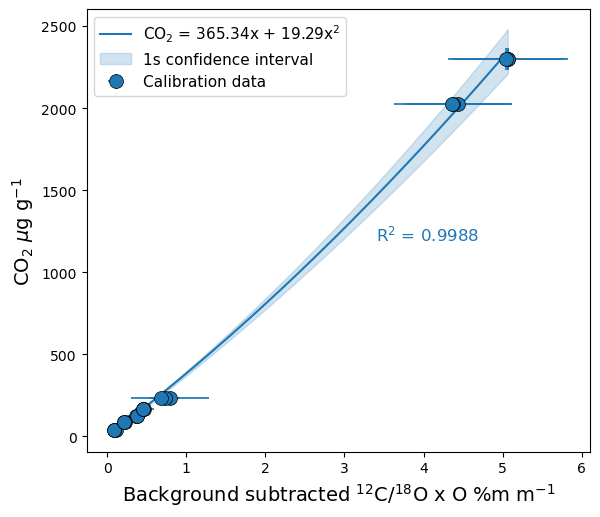

In [4]:
# import libs
from sims_functions import *
import matplotlib.pyplot as plt

# load data
file_path = '/Users/joshwork/Documents/projects/active/working/01_deep_carbon/data/carbon1.csv'

# run the calibration
calibration = process_and_plot(
    file_path, 
    line_color='tab:blue', 
    xlabel='Background subtracted $^{12}$C/$^{18}$O x O %m m$^{-1}$', 
    ylabel='CO$_{2}$ $\mu$g g$^{-1}$', 
    fit_type='polynomial', 
    intercept=False,
    sigma = 1)

# save plot
#plt.tight_layout()
#plt.savefig('cal_curve.png', dpi=300)
#plt.show()